# 📺 Netflix Data Analysis (EDA Project)

This notebook explores a public dataset of Netflix shows and movies to uncover patterns, trends, and insights about the type, origin, release year, and ratings of content available on the platform.

---

**Tools Used:**  
- pandas
- matplotlib
- seaborn


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Inline plotting 
%matplotlib inline

#plot style
sns.set(style='whitegrid',palette='muted')

## 📥 Step 1: Load the Dataset
We use the publicly available dataset from Kaggle containing Netflix shows metadata.


In [2]:
data=pd.read_csv("dataset\\netflix_titles.csv",index_col='show_id')
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 🔍 Step 2: Understand the Data
We begin by checking the structure of the dataset and identifying missing values.


In [3]:
data.info()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## 🧹 Step 3: Data Cleaning
We clean missing values and convert date columns into usable formats.


In [4]:
# drop rows where 'country', 'date _added' or 'rating ' is missing
data=data.dropna(subset=['country','date_added','rating'],axis=0)

#convert date_added to datetime
data['date_added']=pd.to_datetime(data['date_added'].str.strip(),format='%B %d, %Y')

#Extract year added
data['year_added']=data['date_added'].dt.year

#drop columns 'director','cast'(not needed for this project)
column=['director','cast']
data=data.drop(column,axis=1)

data.head()

,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added
show_id,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021
s9,TV Show,The Great British Baking Show,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021


## 📈 Q1: What is the distribution of Movies vs TV Shows?

Let’s see whether Netflix offers more movies or TV shows.


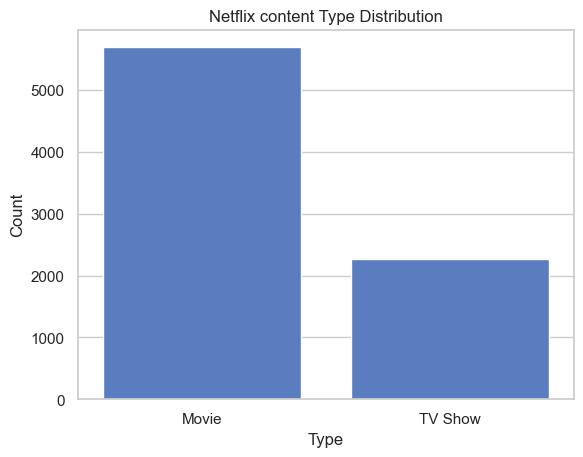

In [5]:
sns.countplot(data=data, x='type')
plt.title('Netflix content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

**Insight:** Netflix hosts significantly more Movies than TV Shows, suggesting a film-heavy content strategy.


## 🌍 Q2: Which countries produce the most Netflix content?


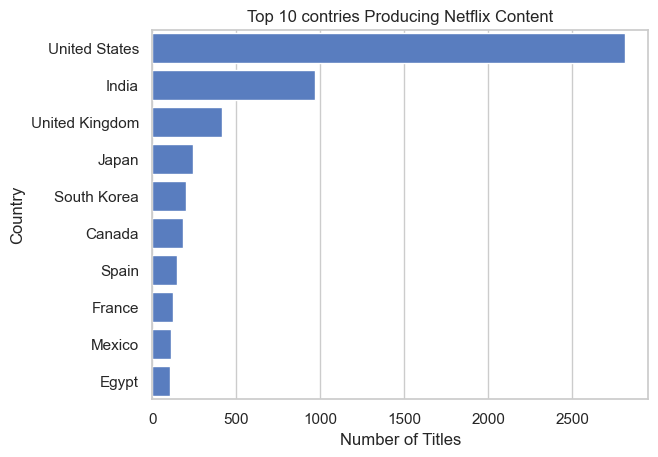

In [6]:
top_countries=data['country'].value_counts().head(10)

sns.barplot(x=top_countries,y=top_countries.index)
plt.title('Top 10 contries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

**Insight:** The USA leads Netflix content production by a huge margin, followed by India and the UK.


## 📅 Q3: How has the number of releases changed over time?


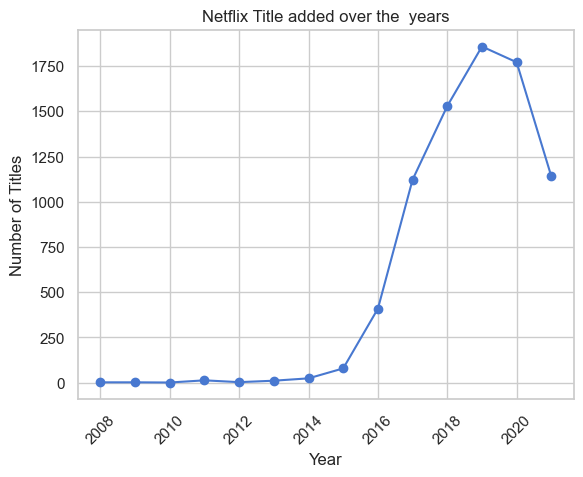

In [7]:
yearly=data['year_added'].value_counts().sort_index()

plt.plot(yearly.index,yearly.values,marker='o')
plt.title('Netflix Title added over the  years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

**Insight:**  
Netflix aggressively expanded its library from 2015 to 2019, peaking in 2019.  
A noticeable drop in new additions occurs after 2019 — likely due to the COVID-19 pandemic disrupting global content production in 2020 and 2021.


## 🎭 Q4: What are the most common genres on Netflix?


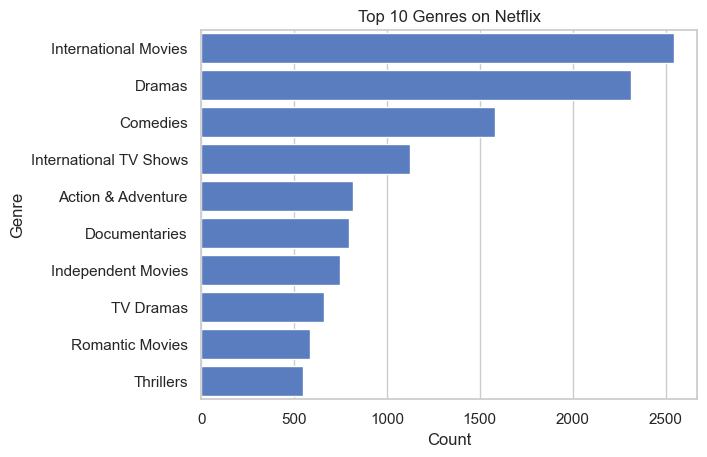

In [8]:
from collections import Counter


all_genres = ', '.join(data['listed_in']).split(', ')
genre_counts= Counter(all_genres)
top_genres=pd.DataFrame(genre_counts.most_common(10),columns=['Genre','Count'])

sns.barplot(data=top_genres,x='Count',y='Genre')
plt.title('Top 10 Genres on Netflix')
plt.show()

**Insight:** International Movies,Dramas, and Comedies are the most represented genres on Netflix.


## 🔞 Q5: What are the most common content ratings?


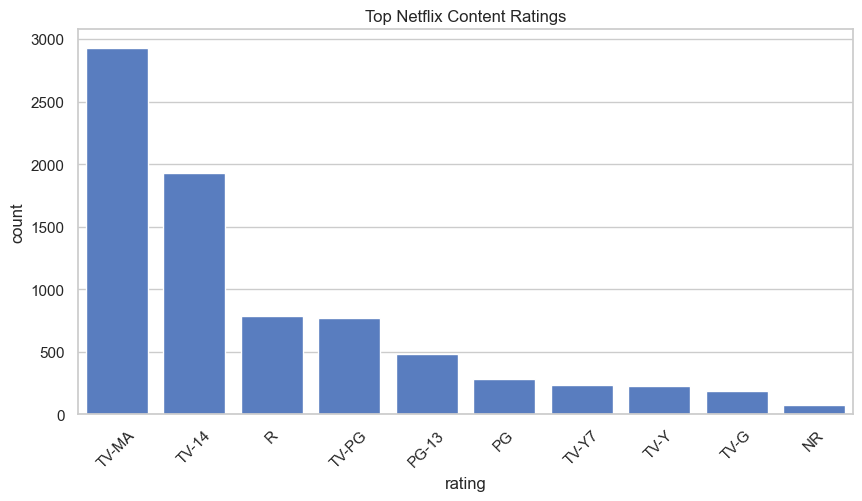

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='rating',order=data['rating'].value_counts().index[:10])
plt.title('Top Netflix Content Ratings')
plt.xticks(rotation=45)
plt.show()

**Insight:** TV-MA is the most common rating, indicating Netflix’s strong catalog of mature content.


## 🧾 Conclusion

- Netflix’s library has significantly more movies than TV shows.
- Most content is produced in the USA, followed by India and the UK.
- Content releases surged after 2016, peaking around 2019.
- Drama and international genres dominate Netflix’s content.
- TV-MA is the most frequent content rating, highlighting a focus on mature audiences.

---

🎯 This beginner project helped me strengthen my skills in:
- pandas for data wrangling
- matplotlib/seaborn for data visualization
- Finding insights from real-world structured data
